Chopra Spectrum

-to do-:
damping ratio vectorization .ok
for loop'ta row major array optimization yap




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_eq = 11

# eq = np.zeros(22, dtype = np.ndarray)

# for i in range(0,n_eq):
#     eq[i] = 
    
eq_list = [np.squeeze(pd.read_csv(f"GMs\EQ{i+1}.txt").values) for i in range(n_eq)]

In [3]:
shapes = [eq_list[i].shape for i in range(n_eq)]

In [4]:
ndata = max(shapes)[0]

delta_t = np.zeros(n_eq)
delta_t = np.array([0.01,0.005,0.005,0.005,0.005,0.005,0.01,0.01,0.02,0.01,0.005])

eq = np.zeros((n_eq, ndata))
for i in range(n_eq):
    eq[i] = np.concatenate((eq_list[i], np.zeros(ndata - len(eq_list[i]))), axis = 0)

In [5]:
del eq_list
print(shapes)
print(np.max(shapes))
print(eq.shape)
# print(n_data)

[(3999,), (4154,), (7988,), (5176,), (9624,), (7998,), (5589,), (1359,), (1999,), (4187,), (5999,)]
9624
(11, 9624)


In [6]:
np.max(np.abs(eq),axis = -1)

array([0.614473, 0.60252 , 0.577423, 0.589738, 0.617016, 0.719468,
       0.583886, 0.616724, 0.553254, 0.678429, 0.626712])

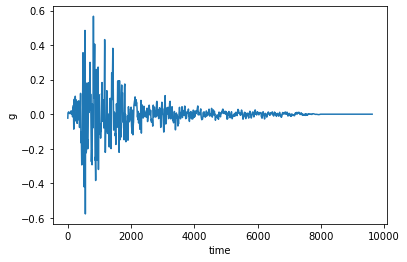

In [7]:
plt.plot(eq[2]);
plt.xlabel('time');
plt.ylabel('g');

In [8]:
# ndata = eq.shape[0]

In [9]:
# implicit
gama = 0.5
beta = 0.25

# explicit
# gama = 0.5
# beta = 1/6

In [10]:
n_period = 1000
ksi = np.array([0.02, 0.05, 0.1])
k = 1.
# delta_t = 0.001

period = np.linspace(0.0001,5, num = n_period)

u = np.zeros((ksi.size, n_period, n_eq, 3, ndata), dtype=float)

# u[ ksi, T , n_eq , disp-vel-acc, n_data]
#                             k[ T ,]
#                             c[ T ,]
#                    p[ n_eq, n_data]

m = k * (period ** 2) / ( 4 * (np.pi ** 2))
# k = 4 * (np.pi ** 2) * m / (period ** 2)
c = 2 * m * ksi[:, np.newaxis] * np.sqrt(k/m)


p = (-1.) * eq[:, np.newaxis, :] * m[:, np.newaxis, np.newaxis, np.newaxis] * 9.81

u[:,:,:,2,0] = (p[:,:,0,0] - c[...,np.newaxis] * u[:,:,:,1,0] - k * u[:,:,:,0,0]) / m[:,np.newaxis]
a1 = (m[:,np.newaxis] / (beta * (delta_t ** 2))) + (gama * c[...,np.newaxis]) / (beta * delta_t)
a2 = (m[:,np.newaxis] / (beta * delta_t)) + ((gama/beta) - 1) * c[...,np.newaxis]
a3 = ((1/(2 * beta)) - 1) * m[:,np.newaxis] + delta_t * ((gama/(2 * beta)) - 1) * c[...,np.newaxis]
k_star = k + a1

In [11]:
for i in range(0,ndata-1):
    p_star = p[:,:,0,i+1] + a1 * u[:,:,:,0,i] + a2 * u[:,:,:,1,i] + a3 * u[:,:,:,2,i]
    u[:,:,:,0,i+1] = p_star / k_star
    u[:,:,:,1,i+1] = gama * (u[:,:,:,0,i+1]-u[:,:,:,0,i]) / (beta * delta_t) + u[:,:,:,1,i] * (1 - gama/beta) + delta_t * u[:,:,:,2,i] * (1 - gama/(2*beta))
    u[:,:,:,2,i+1] = (u[:,:,:,0,i+1]-u[:,:,:,0,i]) / (beta * (delta_t ** 2)) - u[:,:,:,1,i] / (beta * delta_t) - u[:,:,:,2,i] * ((1 / (2*beta)) - 1)

In [12]:
damping_mode = 0

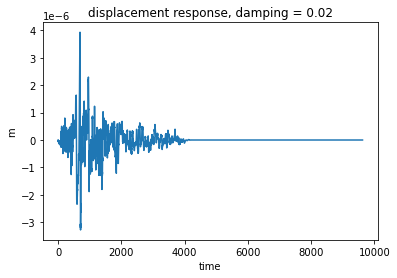

In [13]:
plt.plot(u[damping_mode,1,1,0,:]); # T -- n_eq -- 3 -- n_data
plt.xlabel('time');
plt.ylabel('m');
plt.title(f"displacement response, damping = {ksi[damping_mode]}");

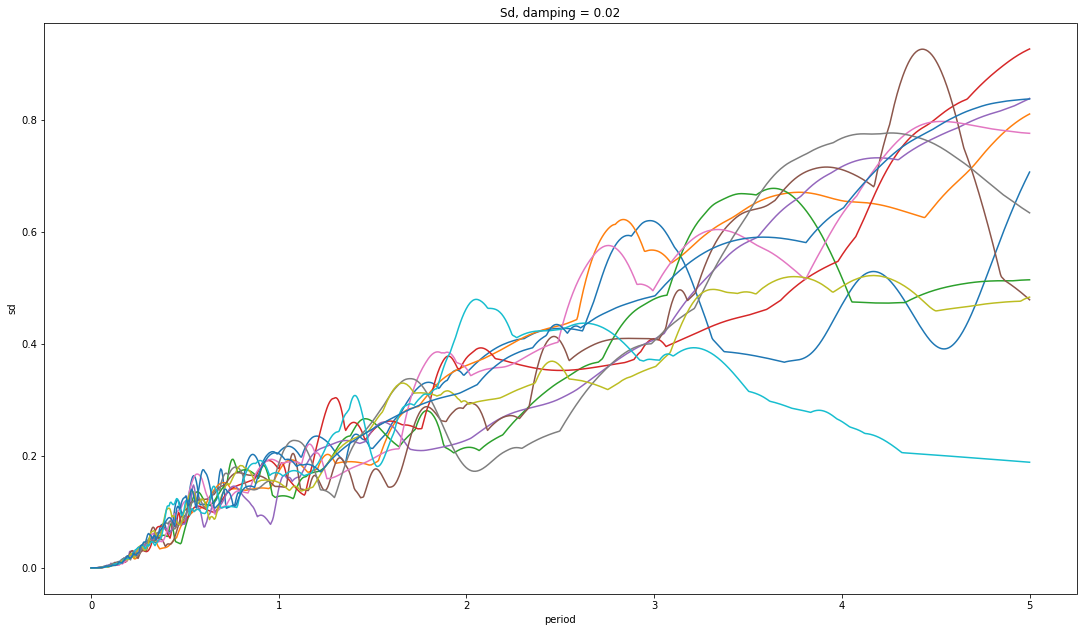

In [14]:
plt.plot(period, np.max(np.abs(u[damping_mode,:,:,0,:]),axis=-1));
plt.xlabel('period');
plt.ylabel('sd');
plt.title(f"Sd, damping = {ksi[damping_mode]}");
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

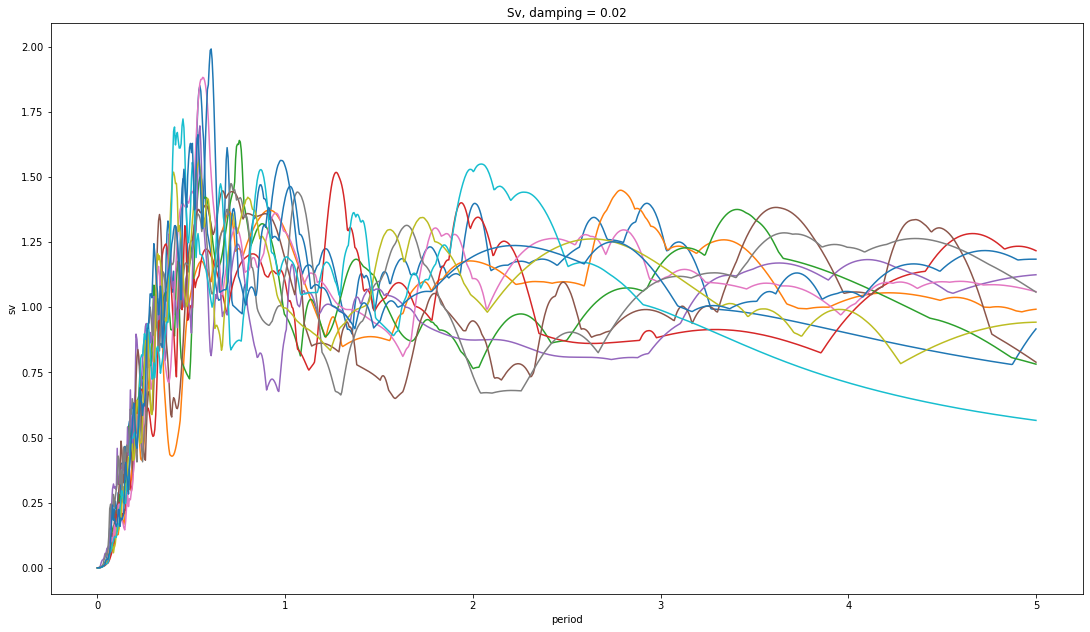

In [15]:
plt.plot(period, np.max(np.abs(u[damping_mode,:,:,1,:]),axis=-1));
plt.xlabel('period');
plt.ylabel('sv');
plt.title(f"Sv, damping = {ksi[damping_mode]}");
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

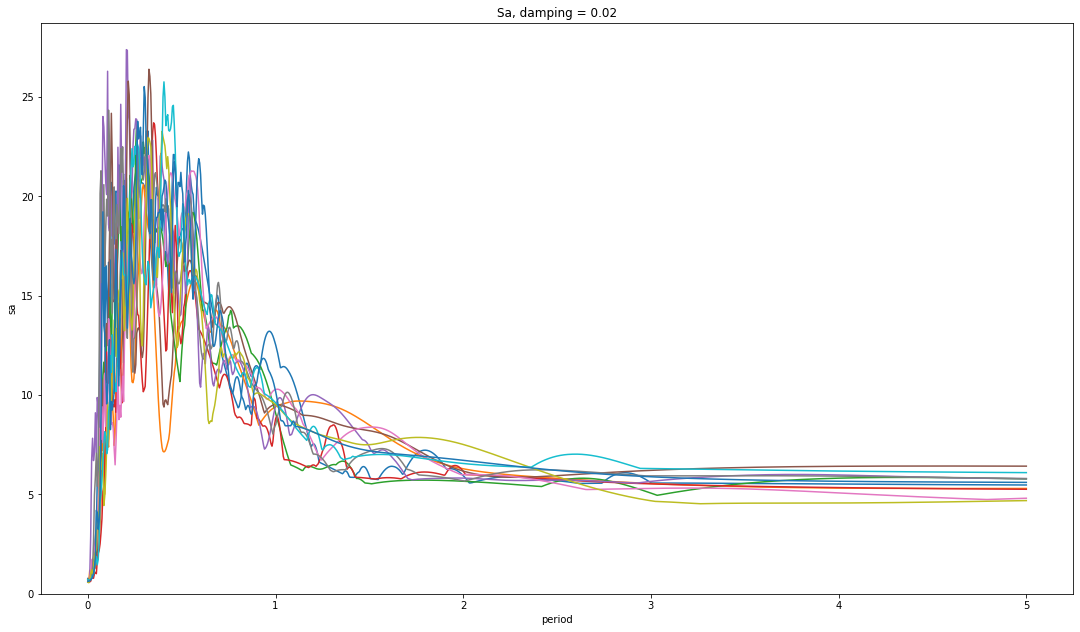

In [16]:
plt.plot(period, np.max(np.abs(u[damping_mode,:,:,2,:] + eq),axis=-1));
plt.xlabel('period');
plt.ylabel('sa');
plt.ylim(bottom = 0);
plt.title(f"Sa, damping = {ksi[damping_mode]}");
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

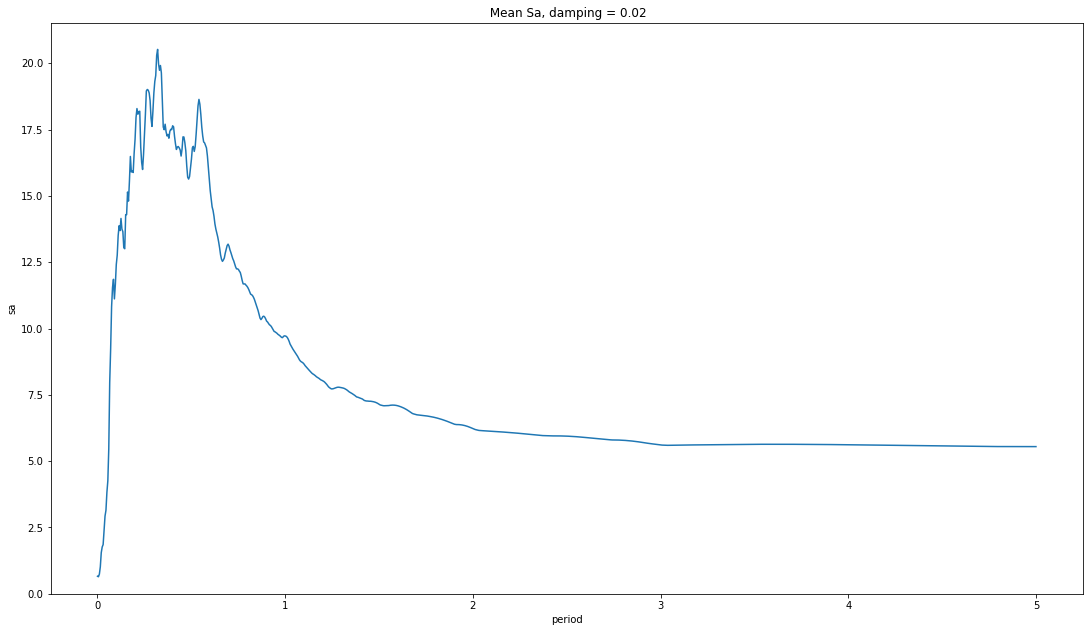

In [17]:
plt.plot(period, np.mean( np.max(np.abs(u[damping_mode,:,:,2,:] + eq),axis=-1), axis=1));
plt.xlabel('period');
plt.ylabel('sa');
plt.ylim(bottom = 0);
plt.title(f" Mean Sa, damping = {ksi[damping_mode]}");
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

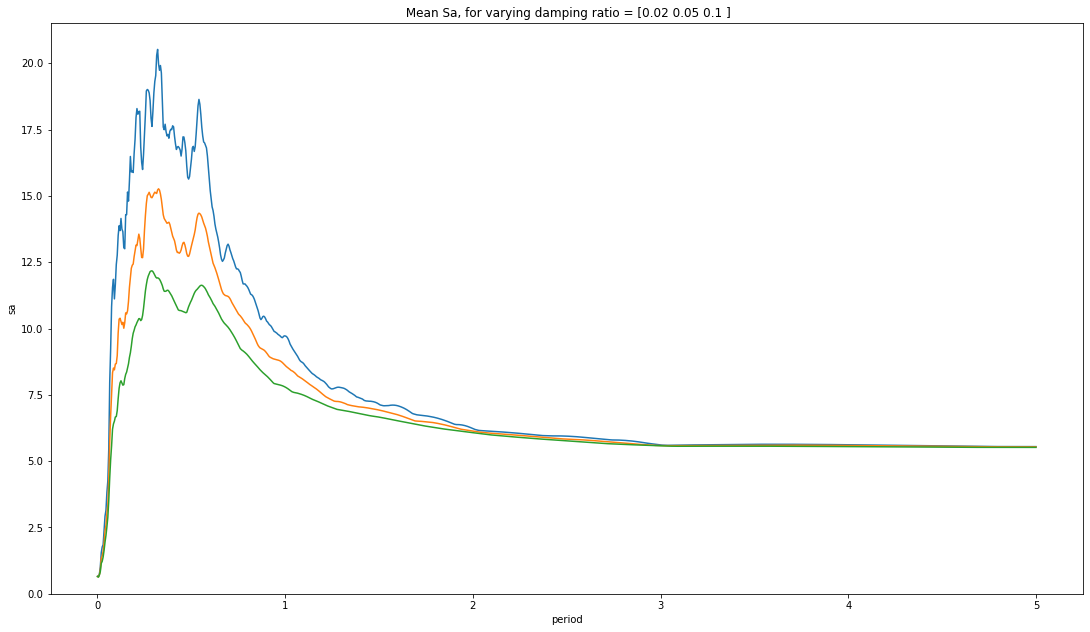

In [18]:
plt.plot(period, np.swapaxes(np.mean( np.max(np.abs(u[:,:,:,2,:] + eq),axis=-1), axis=2),0,1))
plt.xlabel('period');
plt.ylabel('sa');
plt.ylim(bottom = 0);
plt.title(f" Mean Sa, for varying damping ratio = {ksi}");
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)